# Nicholas Hodge<br> OLA 4

### Problem 1

In [92]:
import numpy as np
import tensorflow.keras as keras

from IPython.display import display
import sympy as sp
sp.init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
Y = np.array([0,1,1,0])
x = keras.layers.Input(shape=X.shape[1:])
y = x
y = keras.layers.Dense(5, activation=keras.activations.relu,
                       bias_initializer=keras.initializers.Constant(0.1))(y)
y = keras.layers.Dense(1,activation=keras.activations.sigmoid)(y)

model = keras.Model(x,y)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(),
              metrics=[keras.metrics.BinaryAccuracy()])
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T


In [93]:
history = model.fit(X, Y,
                    batch_size=1,
                    epochs=1000,
                    verbose=0)

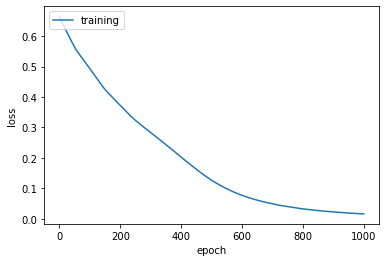

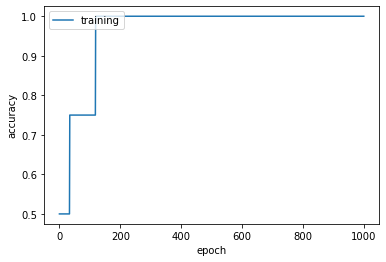

1/1 [==============================] - 0s 145ms/step - loss: 0.0158 - binary_accuracy: 1.0000
Loss: 0.015787702053785324
Accuracy: 1.0


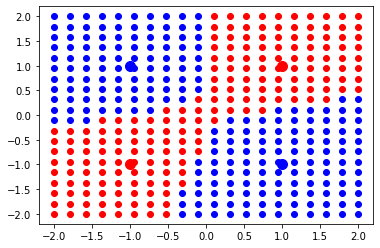

In [94]:
#Plotting
#loss
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

#accuracy
plt.plot(history.history['binary_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

#score
score = model.evaluate(X,Y,verbose=1)
print("Loss:",score[0])
print("Accuracy:",score[1])

predictions=np.round(model.predict(positions)[:,0])
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
plt.plot(X[[1,2],0],X[[1,2],1], 'bo',markersize=10)
plt.show()

### Problem 2

I decided to use binary cross entropy becuase there were only two categories. After using only 2 nodes in the hidden layer didn't work, I increased the node width to 5 and had much better results. I had to increasee the width of the network so that the ReLU had more nodes to interact with, as it will not update negative weights when backpropogating. The positive tradeoff of this is that it removes the vanishing gradient problem.

### Problem 3

In [50]:
x = keras.layers.Input(shape=X.shape[1:])
y = x
y = keras.layers.Dense(3, activation=keras.activations.relu,
                       bias_initializer=keras.initializers.Constant(0.1))(y)
y = keras.layers.Dense(1,activation=keras.activations.sigmoid)(y)

model = keras.Model(x,y)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(),
              metrics=[keras.metrics.BinaryAccuracy()])

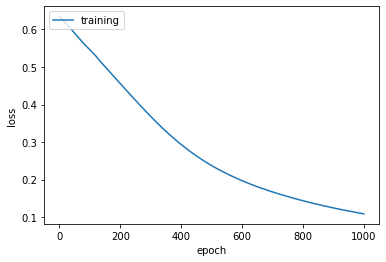

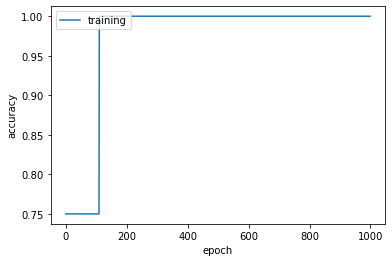

1/1 [==============================] - 0s 144ms/step - loss: 0.1085 - binary_accuracy: 1.0000
Loss: 0.1085379347205162
Accuracy: 1.0


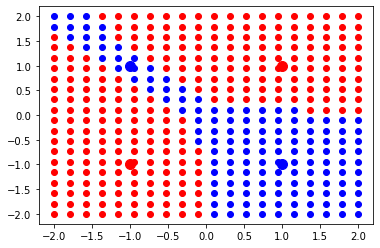

In [51]:
#Training
history = model.fit(X, Y,
                    batch_size=1,
                    epochs=1000,
                    verbose=0)

#Plotting
#loss
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

#accuracy
plt.plot(history.history['binary_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

#score
score = model.evaluate(X,Y,verbose=1)
print("Loss:",score[0])
print("Accuracy:",score[1])

predictions=np.round(model.predict(positions)[:,0])
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
plt.plot(X[[1,2],0],X[[1,2],1], 'bo',markersize=10)
plt.show()

### Problem 4

ReLU makes the network larger because it doesn't update networks with negative values in backpropogation, so it requires a larger network to have more nodes to interact with. We can see in Problem 3 that the hidden layer required a width of 3 nodes instead of the 2 that the hyperbolic tangent  required in the example.

### Problem 5

In [75]:
from keras.datasets import mnist

num_classes = 10

img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x = keras.layers.Input(shape=x_train.shape[1:])
y = x
y = keras.layers.Dense(30 * num_classes,
                       activation=keras.activations.tanh)(y)
y = keras.layers.Dense(num_classes,
                       activation=keras.activations.sigmoid)(y)
model = keras.Model(x,y)
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Nadam(),
              metrics=[keras.metrics.CategoricalAccuracy()])



In [72]:
#Training
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=0,
                    validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Testing loss:', score[0])
print('Testing accuracy', score[1])

Testing loss: 0.07756523787975311
Testing accuracy 0.9811999797821045


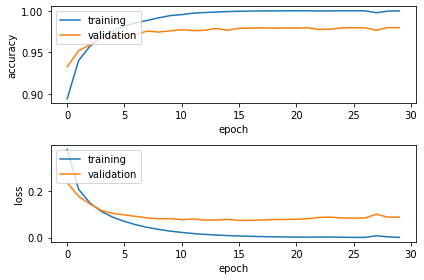

In [76]:
plt.figure()

#accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')

#loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Problem 6

In [86]:
x = keras.layers.Input(shape=x_train.shape[1:])
y = x
y = keras.layers.Dense(num_classes, activation=keras.activations.relu,
                       bias_initializer=keras.initializers.Constant(0.1))(y)
y = keras.layers.Dense(num_classes,activation=keras.activations.sigmoid)(y)
model = keras.Model(x,y)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [87]:
#Training
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print('Testing loss:', score[0])
print('Testing accuracy', score[1])

Testing loss: 0.051486216485500336
Testing accuracy 0.9842900633811951


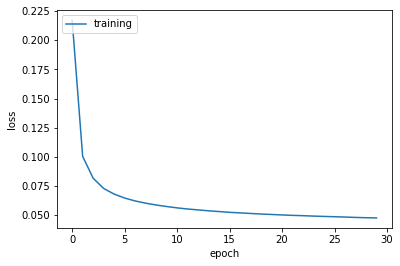

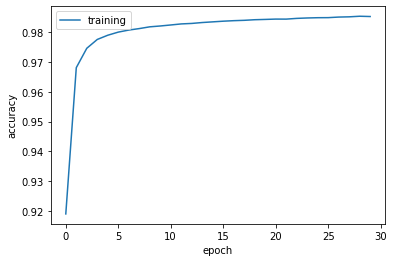

In [88]:
#loss
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

#accuracy
plt.plot(history.history['binary_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
plt.show()

### Problem 7

The ReLU's learning rate was much quicker at reaching 98% than the hyperbolic tangent, reaching it in as little as 5 epochs. The ReLU case even required less width per layer, using only 1/30 of the width than the hyperbolic tangent. I believe that this is due to the linear nature of ReLU being more useful in cases where there are more than 2 categories, whereas hyperbolic tangent requires less in binary cases. With this new test, it seems that ReLU actually makes networks smaller, with what was said in Problem 4 only applying to binary cases.